In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh as bk
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

from plotnine import *
import plotnine.options as pno

import altair as alt

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

In [9]:
dataset = pd.read_csv("data.csv")


## Histogram Test

Univariate, numeric data. No grouping or multiple facets.

### Matplotlib

Standard, well known. Does bin the data for us. Results not beautiful without a lot of work. Every element has to be added in a separate layer. Must call `.show()` to render.

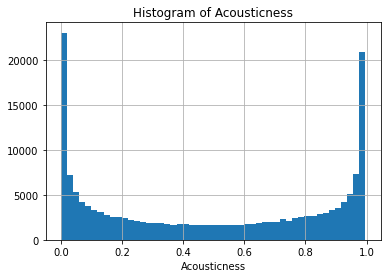

In [10]:
n, bins, patches = plt.hist(dataset.acousticness, 50)
plt.xlabel('Acousticness')
plt.title('Histogram of Acousticness')
plt.grid(True)
plt.show()

### Seaborn

Also well known and widely used. Bins data for us. Every element needs to be added in a separate layer. Can render by calling object name.

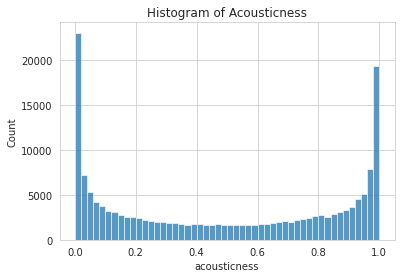

In [11]:
with sns.axes_style("whitegrid"):
    viz = sns.histplot(data=dataset, x="acousticness",  binwidth=.02)
    viz.set_title("Histogram of Acousticness")
    viz

### Bokeh

Must specify whether output is for notebook or file. Rendering is resource heavy and takes some time. Tool will not do bins for you, must create numpy object first. This approach is actually creating rectangles to pretend it is a histogram. Many figure details can be specified in single command. Must use `show()` to render. Highly interactive and beautiful resulting graph.

In [12]:
output_notebook()
hist, edges = np.histogram(dataset.acousticness, bins=50)

p = figure(title="Histogram of Acousticness", 
           y_axis_label='Count', 
           x_axis_label='Acousticness', 
           width=500, 
           height = 300)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])
show(p)

Loading BokehJS ...

### Altair

Tool cannot handle the full complement of data, must limit to < 5000 rows. Returns very beautiful graphs. Layering elements on to object, can return without using `show`.

In [13]:
source = dataset.sample(axis = 0, n=4000)

viz = alt.Chart(source)
viz = viz.mark_bar()
viz = viz.encode(alt.X("acousticness", bin=True),y='count()')
viz = viz.properties(title='Histogram of Acousticness')

viz


alt.Chart(...)

### Plotnine

Emulates the ggplot grammar from R. May not feel "pythonic" if you like the layering approach. Readability high, the geom strategy seems to be well liked. 

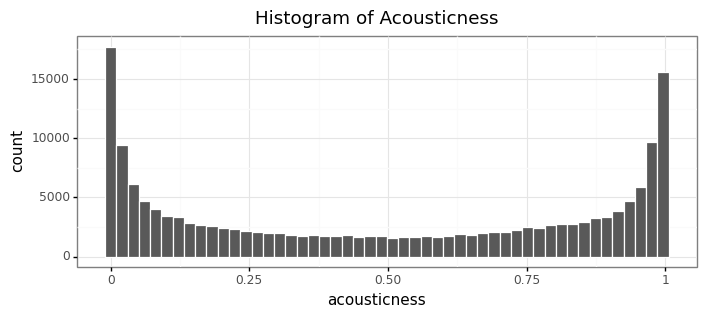

<ggplot: (331165977)>

In [14]:

pno.dpi = (100)
pno.figure_size = (8,3)
ggplot(data=dataset, mapping=aes(x='acousticness')) + \
    theme_bw() + \
    geom_histogram(color='white', bins=50) + \
    labs(title = "Histogram of Acousticness")

### Plotly

Create base object and set many traits with one call. Changing style can be handled in mostly one command. Requires `.show()` to render. Highly interactive, renders faster than bokeh. Not very beautiful default image.

In [15]:
fig = px.histogram(dataset, x="acousticness", nbins=50, title="Histogram of Acousticness", template='plotly_white')
fig.update_layout(
    width=700,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()


## Histogram Results

Unscientific rankings by me, 1 = best, 6 = worst.


|            |features     |beauty    |ease of use   |
|------------|-------------|----------|--------|
|matplotlib  |   4         |   6      |   5    |
|seaborn     |   3         |   4      |   1    |
|bokeh       |   5         |   2      |   6    |
|altair      |   6         |   1      |   4    |
|plotnine    |   2         |   3      |   3    |
|plotly      |   1         |   5      |   2    |

